## **Code Inspired by Jing Ying and Rach**

### **1. Load Data**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [0]:
food_df = pd.read_csv('./drive/My Drive/BT4221_Big Data/food_df.csv')
food_df = food_df.drop('Unnamed: 0', axis=1)
food_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Score Class,Text_processed
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,buy several vitality can dog food product find...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,product arrive label jumbo salt peanutsthe pea...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,confection century light pillowy citrus gelati...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,look secret ingredient robitussin believe find...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive,great taffy great price wide assortment yummy ...


### **2. Create Word Embeddings**

In [0]:
import multiprocessing
import gensim
from gensim.models import Word2Vec

In [0]:
# tokenize Text_processed
food_df['Text_processed_tokenized'] = food_df['Text_processed'].apply(lambda x: str(x).split())
food_df = food_df[food_df['ProductId'] != 'B001IZD3AK']
food_df


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Score Class,Text_processed,Text_processed_tokenized
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,buy several vitality can dog food product find...,"[buy, several, vitality, can, dog, food, produ..."
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,product arrive label jumbo salt peanutsthe pea...,"[product, arrive, label, jumbo, salt, peanutst..."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,confection century light pillowy citrus gelati...,"[confection, century, light, pillowy, citrus, ..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative,look secret ingredient robitussin believe find...,"[look, secret, ingredient, robitussin, believe..."
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive,great taffy great price wide assortment yummy ...,"[great, taffy, great, price, wide, assortment,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393926,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,Positive,great sesame chickenthis good well resturant e...,"[great, sesame, chickenthis, good, well, restu..."
393927,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,Negative,be disappointed flavor chocolate note weak mil...,"[be, disappointed, flavor, chocolate, note, we..."
393928,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Positive,star small give training session try train dog...,"[star, small, give, training, session, try, tr..."
393929,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,Positive,good treat train rewarding dog good grooming l...,"[good, treat, train, rewarding, dog, good, gro..."


In [0]:
# build skip-gram model
model = Word2Vec(food_df['Text_processed_tokenized'], size=300, window=5, min_count=5, workers=multiprocessing.cpu_count(), sg=1, iter=10) 

In [0]:
# save skip-gram model
model.save('./drive/My Drive/BT4221_Big Data/model.pkl')

In [0]:
# load skip-gram model
model = Word2Vec.load('model')

In [0]:
# get vocab of words
words = list(model.wv.vocab)
words

### **3. Generating Cosine Similarity**

In [0]:
#Creating a product list 
prod_list = list(set([x for x in food_df['ProductId']]))
#1st_prd = '0006641040' groupby 1st : 0006641040	
prod_list.sort()
prod_list

['0006641040',
 '141278509X',
 '2734888454',
 '2841233731',
 '7800648702',
 '9376674501',
 'B00002N8SM',
 'B00002NCJC',
 'B00002Z754',
 'B00004CXX9',
 'B00004RAMS',
 'B00004RAMV',
 'B00004RAMX',
 'B00004RAMY',
 'B00004RBDU',
 'B00004RBDW',
 'B00004RBDZ',
 'B00004RYGX',
 'B00004S1C5',
 'B00004S1C6',
 'B000052Y74',
 'B00005344V',
 'B0000535LF',
 'B0000537KC',
 'B00005C2JE',
 'B00005C2M2',
 'B00005C2M3',
 'B00005IX98',
 'B00005OMWO',
 'B00005OMWQ',
 'B00005U2FA',
 'B00005V3DC',
 'B0000643LM',
 'B0000691JF',
 'B000069KQW',
 'B00006FMLY',
 'B00006G930',
 'B00006IDJO',
 'B00006IDJU',
 'B00006IDK9',
 'B00006L2ZT',
 'B00006LL38',
 'B000084346',
 'B00008434E',
 'B00008434F',
 'B00008437P',
 'B000084388',
 'B000084DVR',
 'B000084DYL',
 'B000084E1U',
 'B000084E66',
 'B000084E6V',
 'B000084E6Y',
 'B000084E76',
 'B000084E7R',
 'B000084E9J',
 'B000084E9M',
 'B000084EAD',
 'B000084EBE',
 'B000084EBL',
 'B000084EBO',
 'B000084ED0',
 'B000084EHL',
 'B000084EHT',
 'B000084EHV',
 'B000084EI0',
 'B000084E

In [0]:
prod_list[29985]

'B001IZD8MS'

In [0]:
len(prod_list)

67623

In [0]:
#Create a dictionary containing all the reviews based on the product ID : groupby reviews based on productId
food_rev = pd.DataFrame(food_df.groupby(['ProductId'], as_index = True , sort = True)['Text_processed_tokenized'].apply(lambda x: x.sum()))
food_rev


,Text_processed_tokenized
ProductId,
0006641040,"[day, person, say, chicken, soup, be, go, foll..."
141278509X,"[product, archer, farm, good, drink, mix, mix,..."
2734888454,"[dog, love, chicken, product, china, buy, hard..."
2841233731,"[book, easy, read, ingredient, available, stor..."
7800648702,"[come, huge, tin, big, expect, cookie, sweet, ..."
...,...
B009SF0TN6,"[try, sauce, believe, start, little, sweet, ho..."
B009SR4OQ2,"[buy, hazelnut, paste, nocciola, spread, local..."
B009UOFU20,"[coffee, premium, taste, watery, thin, good, o..."


In [0]:
#helpfulness numerator and denominator 
help_ratings = pd.DataFrame(food_df.groupby(['ProductId'], as_index = True , sort = True)['HelpfulnessNumerator','HelpfulnessDenominator'].apply(lambda x: x.sum()))
help_ratings

,HelpfulnessNumerator,HelpfulnessDenominator
ProductId,,
0006641040,112,125
141278509X,1,1
2734888454,1,1
2841233731,0,0
7800648702,0,0
...,...,...
B009SF0TN6,0,0
B009SR4OQ2,1,1
B009UOFU20,0,0


In [0]:
score_ratings = pd.DataFrame(food_df.groupby(['ProductId'], as_index = True , sort = True)['Score'].apply(lambda x: int(round(x.mean()))))
score_ratings

,Score
ProductId,
0006641040,4
141278509X,5
2734888454,4
2841233731,5
7800648702,4
...,...
B009SF0TN6,5
B009SR4OQ2,5
B009UOFU20,1


In [0]:
NNinput = pd.merge(food_rev, help_ratings, on='ProductId', how='inner')
NNinput = pd.merge(NNinput, score_ratings, on='ProductId', how='inner')
NNinput.loc[:,'Prd_Id'] = prod_list
NNinput

,Text_processed_tokenized,HelpfulnessNumerator,HelpfulnessDenominator,Score,Prd_Id
ProductId,,,,,
0006641040,"[day, person, say, chicken, soup, be, go, foll...",112,125,4,0006641040
141278509X,"[product, archer, farm, good, drink, mix, mix,...",1,1,5,141278509X
2734888454,"[dog, love, chicken, product, china, buy, hard...",1,1,4,2734888454
2841233731,"[book, easy, read, ingredient, available, stor...",0,0,5,2841233731
7800648702,"[come, huge, tin, big, expect, cookie, sweet, ...",0,0,4,7800648702
...,...,...,...,...,...
B009SF0TN6,"[try, sauce, believe, start, little, sweet, ho...",0,0,5,B009SF0TN6
B009SR4OQ2,"[buy, hazelnut, paste, nocciola, spread, local...",1,1,5,B009SR4OQ2
B009UOFU20,"[coffee, premium, taste, watery, thin, good, o...",0,0,1,B009UOFU20


In [0]:
#w2v = Word2Vec.load('./drive/My Drive/BT4221_Big Data/word2vec.pkl')
w2v = Word2Vec.load('./drive/My Drive/BT4221_Big Data/model.pkl')

In [0]:
from scipy import spatial

index2word_set = set(w2v.wv.index2word)

def avg_feature_vector(sentence, model, num_features, index2word_set):
    words = sentence.split()
    feature_vec = np.zeros((num_features, ), dtype='float32')
    n_words = 0
    for word in words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

In [0]:
def calculate_similarity(product1, product2, model):
  # num of features 100 bcos that's how the w2v is trained (can be increased to perform better) --> now it has been changed to 300 features 
  s1_afv = avg_feature_vector(product1, model=model, num_features=300, index2word_set=index2word_set)
  s2_afv = avg_feature_vector(product2, model=model, num_features=300, index2word_set=index2word_set)
  sim = 1 - spatial.distance.cosine(s1_afv, s2_afv)
  return sim

In [0]:
decent = ['B009SR4OQ2','B009SF0TN6','7800648702']

In [0]:
#####################TAKING IN THE INPUT
input_prodid ='B009SF0TN6'
ipt_rev = NNinput[NNinput['Prd_Id'] == input_prodid]
input_prod = ' '.join(ipt_rev['Text_processed_tokenized'][0])
input_prod

'try sauce believe start little sweet honey taste bud become alive flavor sweet onion garlic whiskey mesquite smoke flavor analyze flavor second get awesome habanero kick come side mouth rise heat stage hot href="http wwwamazoncomgpproductb009sasbcw"sweet whiskey habaneroa sauce way overwhelming leave bad taste mouth perfect wait try href="http wwwamazoncomgpproductb009scmuoa"smoke tennessee maplea sauce'

In [0]:
#food_rev['Text_processed_tokenized'][x]
prod_sim = []

for x in range(food_rev.shape[0]): 
  if NNinput['Prd_Id'][x] != input_prodid:
    val = calculate_similarity(input_prod,' '.join(NNinput['Text_processed_tokenized'][x]),w2v)
    prod_sim.append(val)

In [0]:
prod_sim

[0.7441951036453247,
 0.7524623274803162,
 0.6483482718467712,
 0.7012403011322021,
 0.7720122337341309,
 0.5527297854423523,
 0.6402184963226318,
 0.5103090405464172,
 0.6696202754974365,
 0.6991716027259827,
 0.6235032081604004,
 0.7688120603561401,
 0.6206062436103821,
 0.6663160920143127,
 0.6574363708496094,
 0.7160409688949585,
 0.6800941824913025,
 0.6952018737792969,
 0.7853498458862305,
 0.7861177325248718,
 0.7303297519683838,
 0.7721924781799316,
 0.682748019695282,
 0.7898612022399902,
 0.6907898783683777,
 0.8116623163223267,
 0.7794594764709473,
 0.7133920192718506,
 0.7072494029998779,
 0.7233027219772339,
 0.776357114315033,
 0.7972128987312317,
 0.7982654571533203,
 0.6832601428031921,
 0.7986297011375427,
 0.7778703570365906,
 0.7996566891670227,
 0.7876984477043152,
 0.7718508243560791,
 0.7508066892623901,
 0.773089587688446,
 0.7664580345153809,
 0.7664262056350708,
 0.7666134834289551,
 0.6795105934143066,
 0.6668181419372559,
 0.6090656518936157,
 0.6906394958496

In [0]:
nanarray = np.isnan(prod_sim)
itemindex = np.where(nanarray==True)
itemindex

(array([], dtype=int64),)

In [0]:
from collections import Counter
Counter(np.isnan(prod_sim))

Counter({False: 67622})

In [0]:
import statistics 

In [0]:
# taking the mean of the product similarities to act as threshold whether the product gets fed into the network
###shortlisted products
## clearing all the values 
mean_sim = sum(prod_sim)/len(prod_sim)
std_sim =  statistics.stdev(prod_sim)
std_sim
threshold = mean_sim + (2*std_sim)
threshold 






0.8867163759481446

In [0]:
#the shortlisted products
sl_prd = [prod_list[prod_sim.index(x)] for x in prod_sim if x > threshold ]
sim_val = [prod_sim[prod_sim.index(x)] for x in prod_sim if x > threshold ]

In [0]:
fin_NN = NNinput[NNinput['Prd_Id'].isin(sl_prd)]
fin_NN.loc[:,'similarity_values'] = sim_val
fin_NN['HelpfulnessPercentage'] = fin_NN['HelpfulnessNumerator'] / fin_NN['HelpfulnessDenominator'] 

fin_NN = fin_NN.drop(columns=['Text_processed_tokenized','HelpfulnessNumerator','HelpfulnessDenominator','Prd_Id'])
fin_NN['sim_score'] = fin_NN['Score'] * fin_NN['similarity_values'] 
#thresh_val = (fin_NN['sim_score']).mean() + statistics.stdev(prod_sim)
fin_NN['Recommend?'] = np.where(fin_NN['Score'] > 3, 1 , 0)
#fin_NN['Recommend?'] = np.where(fin_NN['sim_score'] > thresh_val, 1 , 0)
fin_NN = fin_NN.drop(columns=['sim_score','Score'])
fin_NN =  fin_NN.dropna()
fin_NN

,similarity_values,HelpfulnessPercentage,Recommend?
ProductId,,,
B0000CDBQZ,0.902931,0.750000,1
B0000CNU4K,0.900453,0.000000,0
B0000DCWWI,0.893457,1.000000,1
B0000DG4MK,0.916455,0.500000,1
B0000DG4MO,0.911115,1.000000,1
...,...,...,...
B008AV5HLS,0.910915,0.763780,1
B008IVJ0OA,0.890506,1.000000,1
B008JHROIM,0.932433,0.300000,1


### **4. Building Neural Network**

In [0]:
import collections
import nltk
from keras import Sequential
from keras.layers import Dense, Embedding, Activation, Flatten

### **Neural Network**

In [0]:
!pip install utils

In [0]:

import matplotlib
import matplotlib.pyplot as plt

Training Accuracy: 90.38%

Testing Accuracy: 90.91%

[[ 0  6]
 [ 0 60]]


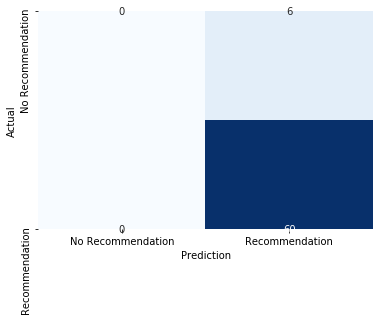

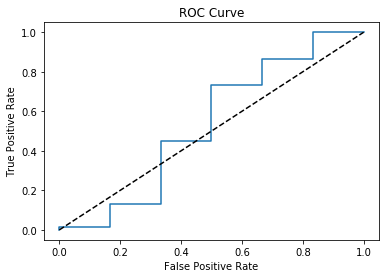

<Figure size 432x288 with 0 Axes>

In [0]:
import utils 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
np.random.seed(16)

# Split the data into a training and testing set
X = fin_NN.loc[:, fin_NN.columns != 'Recommend?']
y = fin_NN.loc[:, 'Recommend?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Build neural network in Keras using sequential(). kera.models from sequential will make it.
model = Sequential()
# 'relu' is always used sa the activation function for intermediate hidden layers. We make 32 nodes and the input dimension is 8 (8 input variables). For the first input layer, you need to specify the number of input variables.
model.add(Dense(32, activation='relu', input_dim=2))

# This is the 2nd hidden layer. Increasing more layers can cause over-fitting and increaing complexity. We are going to use only 2 layers. You can increas the number of layers.
model.add(Dense(16, activation='relu'))

# The final output layer requires to have a activation function that makes a prediction on the class of the label. We are making a simple binary prediction: 1 for patients with diabetes and 0 for patients w/o diabetes. 'sigmoid' function will be ideal for the bianry choices.
model.add(Dense(1, activation='sigmoid'))

# Model compilation. We are defining the parameters of the training process via complie. You need to specify three parameters. We use the optimizer as 'adam'. We use the loss function as binary as we are dealing with binary choices. We use metrics for testing metric as accuracy for percentage.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model training will be initiated
model.fit(X_train, y_train, epochs=200, verbose=False)

# We are evaluating the model from accuracy rate.
scores = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

# Results - Confusion Matrix
y_test_pred = model.predict_classes(X_test)
c_matrix = confusion_matrix(y_test, y_test_pred)
print(c_matrix)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['No Recommendation', 'Recommendation'], yticklabels=['No Recommendation', 'Recommendation'], cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()
plt.clf()

# Results - ROC Curve
y_test_pred_probs = model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
#diagonal line
plt.plot([0,1],[0,1],'--', color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
plt.clf()

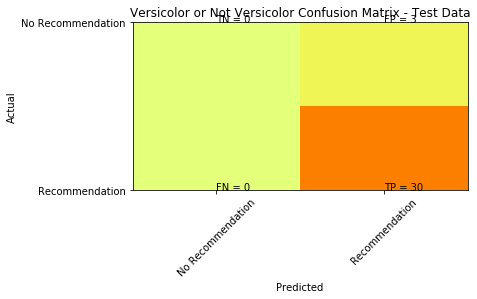

In [0]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(c_matrix, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['No Recommendation','Recommendation']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('Actual')
plt.xlabel('Predicted')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(c_matrix[i][j]))
plt.show()
